# Estadistica descriptiva

La Melina es una especie arborea ampliamente valorada en sector forestal debido a su rápido crecimiento y las cualidades de su madera. Es crucial tener en cuenta que la densidad de plantación, es una de las principales variables que influyen en el crecimiento y aprovechamiento de estas plantaciones, por lo que esta variable ha sido objeto de diversas investigaciones. Actualmente la densidad estándar utilizada por las empresas forestales es de 1111 árboles por hectárea, sin embargo, no siempre es la opción más adecuada para lograr un rendimiento óptimo incluso desde las primeras fases de la plantación, lo que puede conducir a una importante ineficiencia en la asignación de recursos. La densidad de plantación está directamente vinculada a los costos totales de una plantación, lo cual es un factor determinante al diseñar un plan para el establecimiento de una plantación comercial.

Con este analisis nuestro objetivo es identificar patrones de crecimiento en estos especimenes a lo largo de los primeros meses. Para lograrlo, analizaremos cómo la densidad de plantación influye en la altura de los árboles a lo largo del tiempo. Este enfoque nos permitirá detectar tendencias y posibles relaciones entre la densidad y el crecimiento de estos especimenes.

Teniendo esta base de datos trabajaremos sobre diferentes variables, pero la **numerica** y la mas importante es la Altura_Total que nos da la altura conseguida por los arboles en su respectivo mes y su respectivo tratamiento, siendo el tratamiento la principal variable **categorica** bajo la cual estaremos trabajando.

La pregunta principal a ser contestada en esta actividad es:

*   A dia de hoy, ¿Cual es el tratamiento(densidad), que mejor rendimientos ha dado en funcion del crecimiento?


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as sp

In [6]:
nelder_11 = pd.read_excel('/content/drive/MyDrive/UDG/Proyecto - Tesis/BD_Melina_Mes_11.xlsx')
nelder_11.head(3)

FileNotFoundError: ignored

In [ ]:
nelder_11 = nelder_11.drop(['Comentario', 'Med_cuali', 'Altura_Copa', 'Largo_NS', 'Largo_EO'], axis=1)
nelder_11.head(3)

,Fecha de Medicion,Arbol,DAP,Altura_Total,Tratamiento,Fila,Densidad,Medicion
0,2022-09-11,1a,0.5,30.5,a,1,7141,1
1,2022-09-11,1b,0.6,31.8,b,1,4877,1
2,2022-09-11,1c,0.5,28.1,c,1,3321,1


In [4]:
nelder_11.shape

NameError: ignored

In [ ]:
nelder_11 = nelder_11.loc[~(nelder_11 == 0).any(axis=1)]

In [ ]:
nelder_11.shape

(3558, 8)

In [ ]:
nelder_11.dtypes

Fecha de Medicion    datetime64[ns]
Arbol                        object
DAP                         float64
Altura_Total                float64
Tratamiento                  object
Fila                          int64
Densidad                      int64
Medicion                      int64
dtype: object

Ahora mostrare un df en el cual relaciono los tratamientos con las densidades correspondientes de cada uno

In [ ]:
d = nelder_11['Densidad'].unique()
t = nelder_11['Tratamiento'].unique()
dt = pd.DataFrame({'Tratamientos': t, 'Densidades': d})
dt = dt.set_index('Tratamientos')
dt

,Densidades
Tratamientos,
a,7141
b,4877
c,3321
d,2265
e,1544
f,1052
g,716
h,489
i,333


Habiendo hecho este breve analisis exploratorio y ligera limpieza, ahora podemos sacar algunas medidas y graficas

Text(0.5, 1.0, 'Comparacion historica de altura por tratamiento')

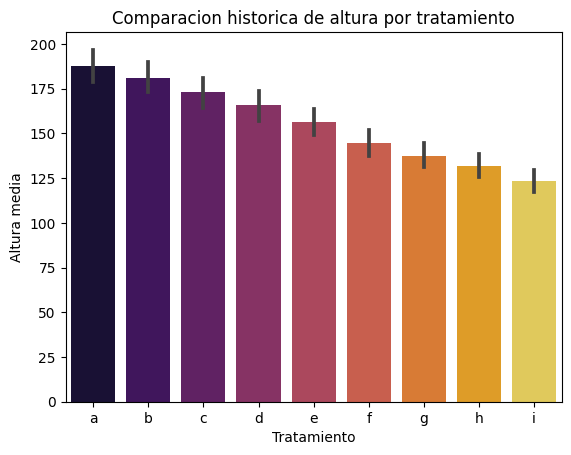

In [ ]:
altura = nelder_11['Altura_Total']
tratamiento = nelder_11['Tratamiento']
sns.barplot(y= altura,x= tratamiento, palette='inferno')
plt.ylabel('Altura media')
plt.title('Comparacion historica de altura por tratamiento')

Podemos notar una gran diferencia en promedio de altura historica de los arboles, contrastando diferentes Densidades (Tratamientos).\


---



## Medidas de tendencia central
Seria convieniente agrupar los datos en funcion de la medicion a la que nos referimos para poder ver la tendencia de crecimiento a los largo de los meses de nuestros especimenes.
Usaremos las medidas de tendencia central respectivas:
1.   $\text{Media}: \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
2.   $\text{Mediana} : P(X \le m) = 0.5$
3.   $\text{Moda} : p(X = M) \ge p(x = x_i) \ \forall \ 1 \le i \le n$. Es el valor que más aparece.
4.   $\text{Percentiles} : P(X \le x_p) = p$ , $p \in [0,1]$

In [3]:
#sacamos media por numero de medicion mensual
medias = nelder_11.groupby(['Medicion'])['Altura_Total'].mean()
medias

NameError: ignored

In [ ]:
#sacamos mediana por numero de medicion mensual
medians = nelder_11.groupby(['Medicion'])['Altura_Total'].median()
medians

Medicion
1      26.50
2      40.15
3      80.50
4     124.40
5     154.65
6     172.80
7     194.90
8     214.00
9     227.00
10    235.00
11    264.00
Name: Altura_Total, dtype: float64

In [ ]:
#sacamos moda por numero de medicion mensual
modas = nelder_11.groupby(['Medicion'])['Altura_Total'].apply(lambda x: x.mode().iloc[0])
modas

Medicion
1      26.0
2      40.1
3      93.2
4     105.0
5     150.3
6     153.0
7     200.0
8     200.0
9     232.0
10    234.0
11    258.0
Name: Altura_Total, dtype: float64

Obvservando estos resultados podemos ver que los arboles han crecido alrededor de 230 cm a lo largo de los 11 meses que lleva el experimento. \
Si comparamos las 3 medidas de tendencia central, creo que es claro que la mas util en este caso seria el promedio, dado que es la mas precisa, y no hay outliers o datos atipicos que puedan llegar a estorbar a dicha medida, asi que usemosla para hacer una comparacion actual.


In [ ]:
# filtramos los datos para solo contar con los actuales y usamos un groupby para contrastar
media_dens = nelder_11[nelder_11['Medicion'] == 11].groupby('Tratamiento').mean()
media_dens['Altura_Total']

Tratamiento
a    318.194444
b    308.527778
c    290.055556
d    276.861111
e    260.666667
f    243.500000
g    223.805556
h    212.277778
i    193.657143
Name: Altura_Total, dtype: float64

Text(0.5, 1.0, 'Comparacion actual de tratamiento')

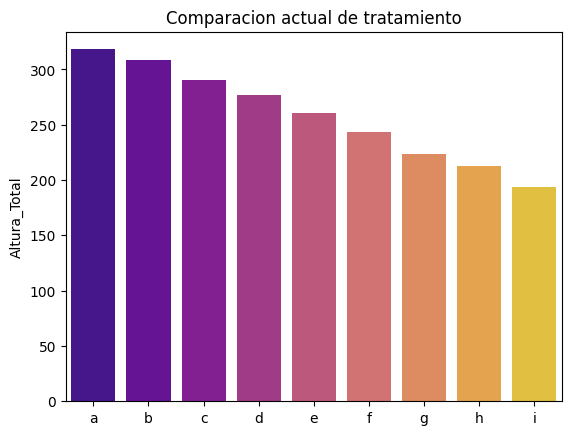

In [ ]:
mean_a_d = media_dens['Altura_Total']
sns.barplot(y = mean_a_d, x = nelder_11['Tratamiento'].unique(), palette='plasma')
plt.title('Comparacion actual de tratamiento')

Despues de haber visto el patron de crecimiento de los arboles segun el tratamiento, podemos notar que los valores difieren de nuestro anterior grafico, ya que estos no cuentan con las medidas iniciales del experimento, si no que solo utiliza las medidas actuales de nuestros especimenes. \
A pesar de esto podemos darnos cuenta que el patron de crecimiento sigue ahi demostrando una gran ventaja los especimenes con una densidad mayor.

In [ ]:
#Para los percentiles hagamos una serie de pandas para sacarlos
t_a_11 = nelder_11[nelder_11['Medicion'] == 11]
t_a_11 = t_a_11['Altura_Total']
t_a_11 = t_a_11.reset_index()
t_a_11 = t_a_11.drop('index', axis = 1)
t_a_11

,Altura_Total
0,365.0
1,332.0
2,285.0
3,290.0
4,235.0
...,...
318,255.0
319,289.0
320,332.0
321,358.0


In [ ]:
#ahora vayamos con los percentiles
p_25 = np.quantile(t_a_11,0.25)
p_50 = np.quantile(t_a_11,0.50)
p_75 = np.quantile(t_a_11,0.75)
print(f'Con las medidas actuales, nuestros percentiles son: \n Percentil 25 = {p_25} \n Percentil 50 = {p_50} \n Percentil 75 = {p_75}')

Con las medidas actuales, nuestros percentiles son: 
 Percentil 25 = 229.5 
 Percentil 50 = 264.0 
 Percentil 75 = 294.5


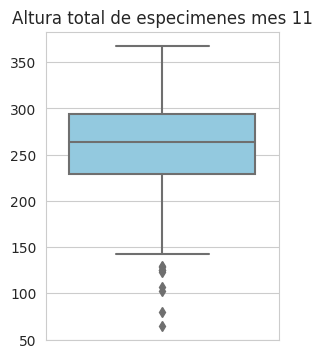

In [ ]:
#representemoslo de manera grafica
sns.set_style('whitegrid')
plt.figure(figsize=(3, 4))
sns.boxplot(data = t_a_11, color = 'skyblue')
plt.xlabel('')
plt.gca().set_xticks([])
plt.title('Altura total de especimenes mes 11')
plt.show()

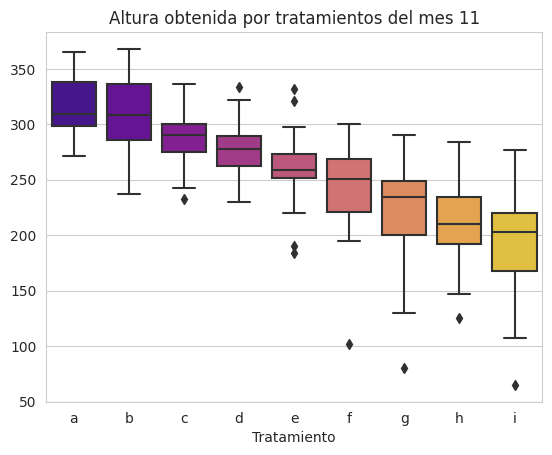

In [ ]:
#Ahora contrastemos la distribucion de las medidas de ese mes, en funcion de su tratamiento
t_a_11_df = nelder_11[nelder_11['Medicion'] == 11]
t_a_11_df = t_a_11_df[['Altura_Total','Tratamiento']]
t_a_11_df = t_a_11_df[t_a_11_df['Altura_Total'] >= 50]
sns.set_style("whitegrid")
sns.boxplot(data = t_a_11_df, y = t_a_11_df['Altura_Total'], x = t_a_11_df['Tratamiento'], palette='plasma')
plt.title('Altura obtenida por tratamientos del mes 11')
plt.ylabel('')
plt.show()

como podemos ver, cuando sacamos los cuartiles de las medidas en general del mes 11, este nos hacia ver que las medidas de dicho mes rondaban entre 150 y 350, pero si desglosamos todas esas medidas contrastandolas en funcion de sus medidas, vemos que, ademas de obtener una gran ventaja en altura a medida que aumenta la densidad, tambien podemos ver una notable mejora en la concentracion de las medidas, haciendo que los outliers o datos atipicos disminuyan, por lo que podemos deducir que mientras mas juntos estan los arboles en sus primeras etapas, estos tienden a tener un crecimiento mas **parejo**


---



## Medidas de dispersion

Con las medidas de dispersion podremos ver que tanto se alejan nuestros datos de la medida de tendencia central, y en nuestro contexto podremos ver que tan variadas son nuestras medidas en el mes correspondiente segun el tratamiento.

Para esto utilizaremos:


*   $\text{Varianza} :s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$

*   $\text{Desviacion estandar} :s = \sqrt{s^2}$
*   $\text{Coeficiente de variación} :C_V = \frac{s}{\bar{x}} \times 100$





In [ ]:
#Empecemos con la varianza
#tomemos los datos del mes 11 para sacarla
var = np.var(t_a_11['Altura_Total'])
print(f'La varianza de todas las medidas del mes 11 es: {round(var,4)}')

La varianza de todas las medidas del mes 11 es: 2824.979


In [ ]:
# ahora vayamos con la desviacion estandar o tipica
std = np.std(t_a_11['Altura_Total'])
print(f'La desviacion estandar de las medidas del mes 11 es: {round(std,4)}')

La desviacion estandar de las medidas del mes 11 es: 53.1505


In [ ]:
# Finalmente vayamos con el coeficiente de variacion
mean_11 = t_a_11['Altura_Total'].mean()
CV = (std/mean_11)*100
print(f'El coeficiente de variación es: {round(CV,2)}%')

El coeficiente de variación es: 20.54%


Ahora usemos la desviacion estandar y el coeficiente de variacion para comprobar la hipotesis planteada de: en cuando mayor es la densidad mas igualitario es el desarrollo de nuestros arboles.
Para esto, usemos las graficas anteriores para obtener una pista de cual seria el mejor par de tratamientos para realizar este contraste.
Evidentemente las que muestran mas diferencia en cuanto a dispersion de datos es el tratamiento a y el tratamiento i (el de mayor densidad y el de menor), asi que usemos estos con los datos del ultimo mes.

In [ ]:
t_a_11_a = nelder_11[nelder_11['Tratamiento'] == 'a']
t_a_11_a = t_a_11_a[nelder_11['Medicion'] == 11]
t_a_11_a = t_a_11_a['Altura_Total']
std_a = round(np.std(t_a_11_a),4)
CV_a = round((std_a/t_a_11_a.mean())*100,2)
print(f'La desviacion estandar del tratamiento "a" en el Mes 11 es: {std_a} \npor otro lado, su coeficiente de variacion es de: {CV_a} %')

La desviacion estandar del tratamiento "a" en el Mes 11 es: 26.5192 
por otro lado, su coeficiente de variacion es de: 8.33 %


In [ ]:
t_a_11_i = nelder_11[nelder_11['Tratamiento'] == 'i']
t_a_11_i = t_a_11_i[nelder_11['Medicion'] == 11]
t_a_11_i = t_a_11_i['Altura_Total']
std_i = round(np.std(t_a_11_i),4)
CV_i = round((std_i/t_a_11_i.mean())*100,2)
print(f'La desviacion estandar del tratamiento "i" en el Mes 11 es: {std_i} \npor otro lado, su coeficiente de variacion es de: {CV_i} %')

La desviacion estandar del tratamiento "i" en el Mes 11 es: 46.7864 
por otro lado, su coeficiente de variacion es de: 24.16 %


Como podemos notar, contrastando las medidas de dispersion de los dos tratamientos, vemos que el tratamiento con menor densidad (i) llega casi a doblar el valor de la desviacion estandar del tratamiento a, tambien cabe añadir que, de igual manera, el tratamiento i, llega a triplicar el valor de el coeficiente de variacion del tratamiento.
habiendo obtenido estos datos podemos confirmar que la dispersion de las medidas se va reduciendo conforme aumentamos la densidad. En otras palabras, mientras mayor es el numero de arboles en un area determinada, mucho mas parejo sera el crecimiento de todos con el avance del tiempo, y tambien mucho mayor sera su crecimiento.

---



## Asimetría y Curtosis

De igual manera, utilizaremos los datos del mes 11 para identificar estas propiedades.

Text(0, 0.5, 'Frecuencia')

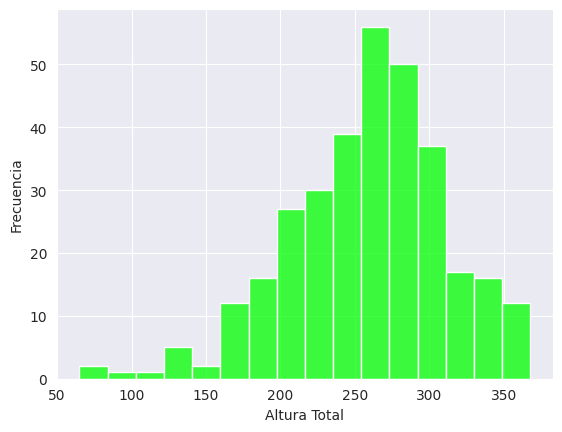

In [ ]:
a = t_a_11['Altura_Total']
sns.set_style('darkgrid')
sns.histplot(a, color='lime')
plt.xlabel('Altura Total')
plt.ylabel('Frecuencia')

Al graficar los datos en un histograma podemos notar que la dispersion de los datos tiene cierta forma gaussiana, pero es inevitable señalar la notable **asimetria negativa**, tambien es notable que la curtosis de la forma es **Leptocúrtica**.  

Seria bueno usar funciones para automatizar estos diagnosticos:

In [1]:
# La asimetria de Fisher dicta que si el coeficiente es igual a 0, entonces la funcion es totalmente simetrica
# si el coeficiente es mayor que 0, entonces es una asimetria positiva
#por ultimo, si el coeficiente es menor que 0, tenemos una asimetria negativa

def asimetria (s):
    """
    Devuelve el diagnostico de asimetria del conjunto de datos
    Args:
        s:serie
    Return:
        Diagnostico
    """
    x = round(sp.skew(s),2)
    if x == 0:
        return print(f'Tu conjunto de datos tiene una simetria perfecta')
    elif x >= 0:
        return print(f'Tu conjunto de datos tiene una asimetria positiva, y es de: {x}')
    else:
        return print(f'Tu conjunto de datos tiene una asimetria negativa y es de: {x}')

In [ ]:
asimetria(a)

Tu conjunto de datos tiene una asimetria negativa y es de: -0.52


In [ ]:
# si la curtosis es igual a 0 entonces seria Mesocúrtica
# si la curtosis es mayor a 0 entonces seria Leptocúrtica
# si la curtosis es menor que 0 entonces seria Platicúrtica

def curtosis (s):
    """
    Devuelve el diagnostico de curtosis del conjunto de datos
    Args:
        s:serie
    Return:
        Diagnostico
    """
    x = round(sp.kurtosis(s),2)
    if x == 0:
        return print(f'Tu conjunto de datos tiene una Curtosis Mesocúrtica')
    elif x >= 0:
        return print(f'Tu conjunto de datos tiene una Curtosis Leptocúrtica, y es de: {x}')
    else:
        return print(f'Tu conjunto de datos tiene una Curtosis Platicúrtica y es de: {x}')

In [ ]:
curtosis(a)

Tu conjunto de datos tiene una Curtosis Leptocúrtica, y es de: 0.59


Con esto comprobamos que las sospechas de Asimetria y Curtosis eran ciertas!.
En el caso de la asimetria, podemos inferir que la mayor cantidad de las medidas actuales de la plantacion se concentran entre los 250 y 300, siendo pocos los registros de medida, que rondan entre los 100 y 200 centimetros, aunque aun hay registros mas abajo de eso que provocan la asimetria negativa, en la curtosis, podemos ver que debido a la gran concentracion de registros que hay alrededor de los 250-300 cm, tenemos unos picos bastante notables alrededor de las medidas de la mediana y esto termina provocando una Curtosis Leptocúrtica la cual es positiva.

Asi que volviendo a la pregunta principal, tomando en cuenta los datos obtenidos, y los analisis que hemos hecho, podemos decir que el mejor tratamiento con el que se cuenta en el experimento hasta ahora, y el que mejor rendimientos ha dado es: el **Tratamiento i**.